In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel('risk_map.xlsx')

In [ ]:
df.columns =['ID', 'risk', 'damage', 'prob',
       'speed', 'sens']

In [ ]:
df

,ID,risk,damage,prob,speed,sens
0,1,Снижение реальных доходов населения,4,4,2,3.333333
1,2,увеличение стоимости активов,4,4,3,3.666667
2,3,ошибки в финансовых моделях и отчетах,4,2,4,3.333333
3,4,"Риски, связанные с увеличением расходов",4,3,3,3.333333
4,5,"неграмотное управление, недостаток надзора, на...",4,2,4,3.333333
5,6,Снижение укомплектованности персоналом в связи...,4,3,3,3.333333
6,7,Рост процентных ставок,3,4,3,3.333333
7,8,Риск роста темпов инфляции,3,5,2,3.333333
8,9,Риск изменения потребительских предпочтений и ...,3,2,2,2.333333
9,10,Повышение цен на импортное оборудование и мате...,3,5,3,3.666667


In [ ]:
df['sens'] = df['sens'].round().astype('int')

In [ ]:
prob

array([5, 4, 3, 2, 1])

In [ ]:
damage = np.arange(1, 6)
prob = np.arange(5, 0, -1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

In [ ]:
X

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [ ]:
Y

array([[5, 5, 5, 5, 5],
       [4, 4, 4, 4, 4],
       [3, 3, 3, 3, 3],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1]])

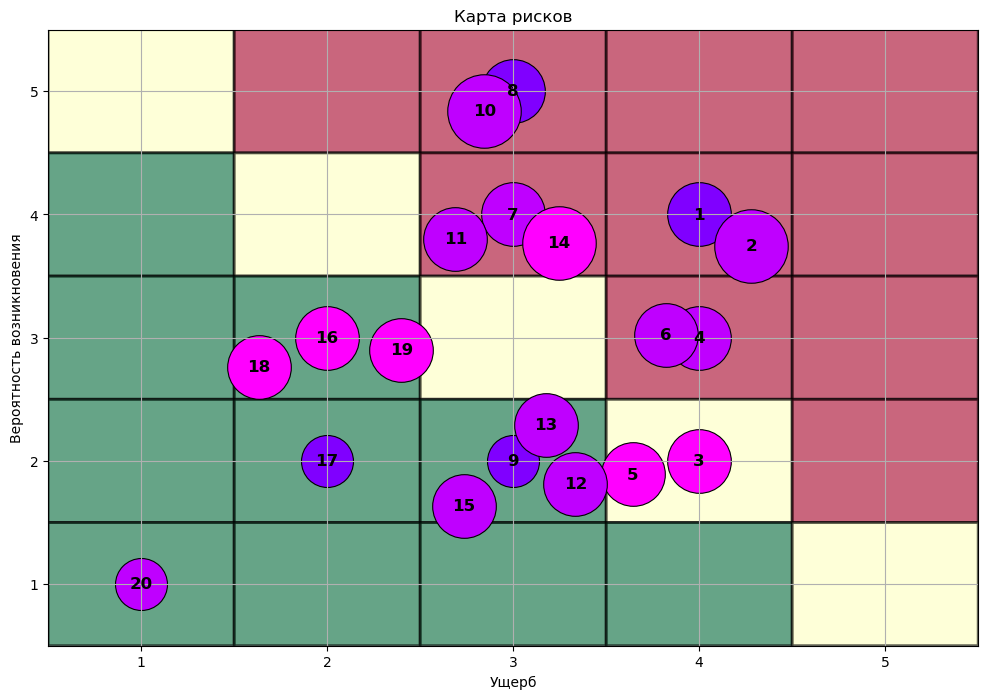

In [ ]:
# Устанавливаем начальное состояние генератора случайных чисел
np.random.seed(15)

# Пример данных
damage = np.arange(1, 6)
prob = np.arange(5,0,-1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

# Создаем матрицу значений, где каждый элемент - целочисленное значение от 1 до 9
# Это позволит нам раскрасить области графика в три разных цвета
Z = np.zeros_like(X, dtype=int)
Z[np.triu_indices_from(Z, k=1)] = 1  # Ниже диагонали
Z[np.diag_indices_from(Z)] = 2       # Диагональ
Z[np.tril_indices_from(Z, k=-1)] = 3 # Выше диагонали

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2, alpha=0.6)  # Используем кастомную цветовую карту RdYlGn
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Создаем список для отслеживания уже использованных координат
used_coordinates = []

# Накладываем график рассеяния
for i, row in df.iterrows():
    # Проверяем, были ли уже использованы эти координаты
    if (row['damage'], row['prob']) in used_coordinates:
        # Если да, находим другие координаты, на которых еще не было точек
        offset_x = np.random.uniform(-0.4, 0.4)
        offset_y = np.random.uniform(-0.4, 0.4)
        while (row['damage'] + offset_x, row['prob'] + offset_y) in used_coordinates:
            offset_x = np.random.uniform(-0.4, 0.4)
            offset_y = np.random.uniform(-0.4, 0.4)
        x = row['damage'] + offset_x
        y = row['prob'] + offset_y
    else:
        # Если нет, используем обычные координаты
        x = row['damage']
        y = row['prob']

    # Добавляем координаты в список использованных
    used_coordinates.append((x, y))

    # Размер круга зависит от чувствительности, умноженной на масштабирующий коэффициент
    size = row['sens'] * 700  # В данном случае используем 700

    # Цвет круга зависит от скорости
    color = (row['speed'] / df['speed'].max(), 0, 1)  # RGB-спецификация цвета

    # Создаем круг
    plt.scatter(x, y, s=size, c=[color], edgecolors='k', linewidths=0.8)

    # Добавляем номер из столбца ID
    plt.text(x, y, str(row['ID']), fontsize=12, ha='center', va='center', color='black', weight='bold')

plt.grid(True)
plt.show()


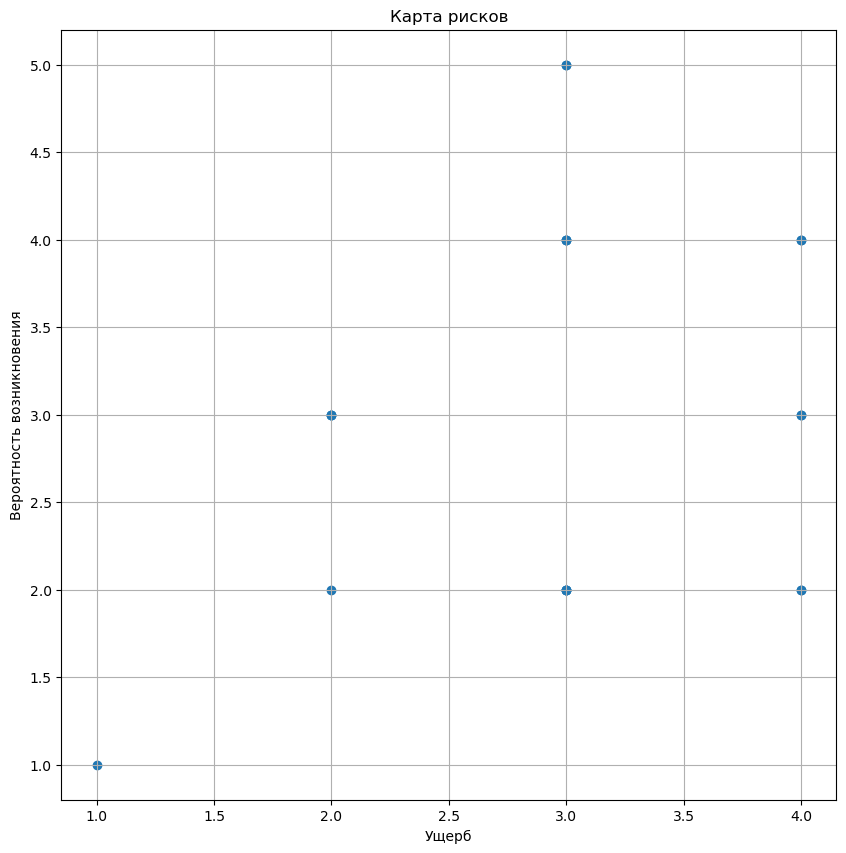

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df['damage'], df['prob'])
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')
plt.grid(True)
plt.show()

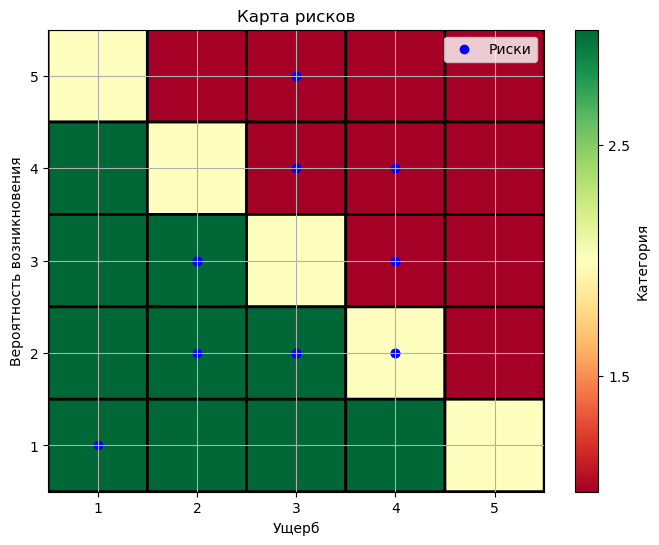

In [ ]:
# Пример данных
damage = np.arange(1, 6)
prob = np.arange(5,0,-1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

# Создаем матрицу значений, где каждый элемент - целочисленное значение от 1 до 9
# Это позволит нам раскрасить области графика в три разных цвета
Z = np.zeros_like(X, dtype=int)
Z[np.triu_indices_from(Z, k=1)] = 1  # Ниже диагонали
Z[np.diag_indices_from(Z)] = 2       # Диагональ
Z[np.tril_indices_from(Z, k=-1)] = 3 # Выше диагонали

# Создаем тепловую карту
plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2)  # Используем кастомную цветовую карту RdYlGn
plt.colorbar(ticks=[1.5, 2.5, 3.5], label='Категория')  # Добавляем цветовую шкалу с категориями
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Накладываем график рассеяния
plt.scatter(df['damage'], df['prob'], color='blue', label='Риски')  # Создаем график рассеяния
plt.legend()  # Добавляем легенду

plt.grid(True)
plt.show()


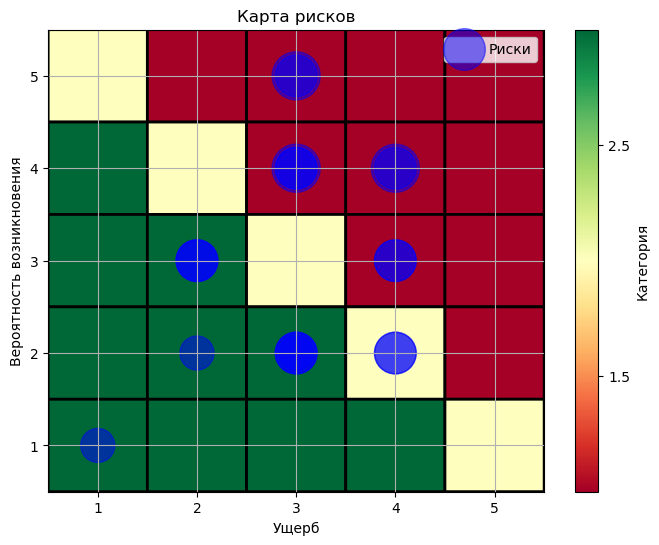

In [ ]:
# Пример данных
damage = np.arange(1, 6)
prob = np.arange(5,0,-1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

# Создаем матрицу значений, где каждый элемент - целочисленное значение от 1 до 9
# Это позволит нам раскрасить области графика в три разных цвета
Z = np.zeros_like(X, dtype=int)
Z[np.triu_indices_from(Z, k=1)] = 1  # Ниже диагонали
Z[np.diag_indices_from(Z)] = 2       # Диагональ
Z[np.tril_indices_from(Z, k=-1)] = 3 # Выше диагонали

# Создаем тепловую карту
plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2)  # Используем кастомную цветовую карту RdYlGn
plt.colorbar(ticks=[1.5, 2.5, 3.5], label='Категория')  # Добавляем цветовую шкалу с категориями
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Накладываем график рассеяния
plt.scatter(df['damage'], df['prob'],s=df['sens']*300, color='blue', alpha=0.5, label='Риски')  # Создаем график рассеяния
plt.legend()  # Добавляем легенду

plt.grid(True)
plt.show()


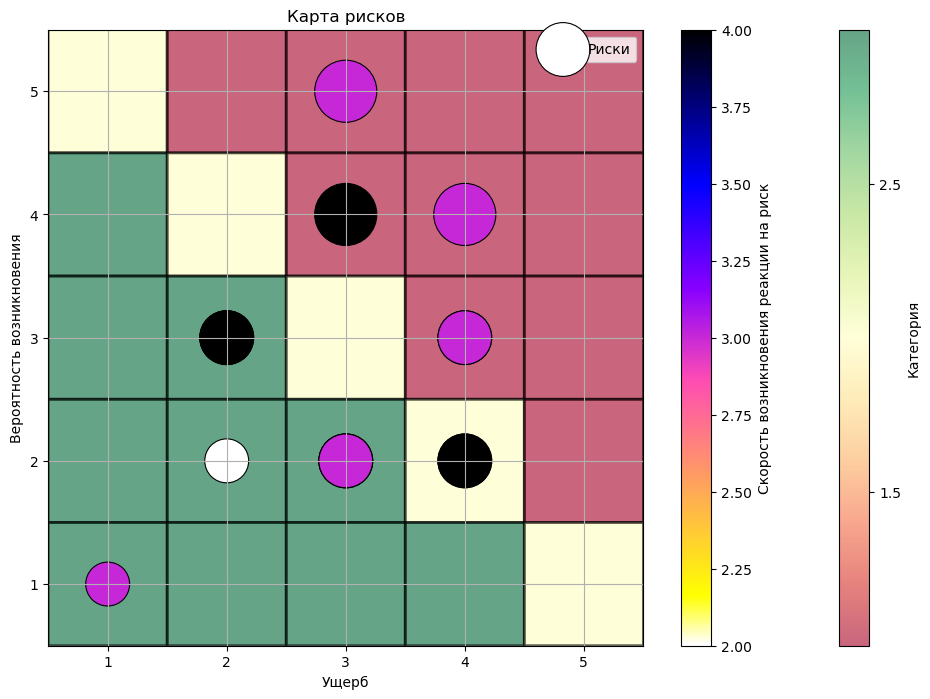

In [ ]:
#Данные для сетки
damage = np.arange(1, 6)
prob = np.arange(5,0,-1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

# Создаем матрицу значений, где каждый элемент - целочисленное значение от 1 до 9
# Это позволит нам раскрасить области графика в три разных цвета
Z = np.zeros_like(X, dtype=int)
Z[np.triu_indices_from(Z, k=1)] = 1  # Ниже диагонали
Z[np.diag_indices_from(Z)] = 2       # Диагональ
Z[np.tril_indices_from(Z, k=-1)] = 3 # Выше диагонали

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2, alpha = 0.6)  # Используем кастомную цветовую карту RdYlGn
plt.colorbar(ticks=[1.5, 2.5, 3.5], label='Категория')  # Добавляем цветовую шкалу с категориями
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Накладываем график рассеяния
scatter = plt.scatter(df['damage'], df['prob'],s=df['sens']*500,c = df['speed'], cmap = 'gnuplot2_r',edgecolor='k', linewidth=0.8, label='Риски')  # Создаем график рассеяния
plt.colorbar(scatter, label = 'Скорость возникновения реакции на риск')
plt.legend()  # Добавляем легенду

plt.grid(True)
plt.show()

In [ ]:
pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from adjustText import adjust_text

In [ ]:
for i, row in df.iterrows():
    plt.text(row['damage'], row['prob'], str(row['ID']), fontsize=12, ha='center', va='center', color='white', weight='bold')


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

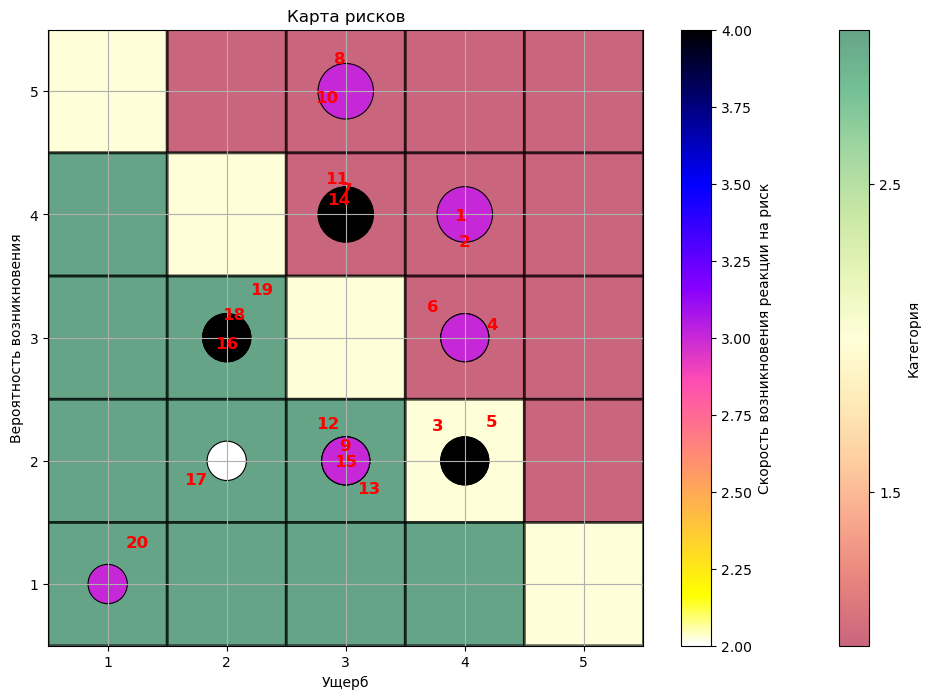

In [ ]:
#Данные для сетки
damage = np.arange(1, 6)
prob = np.arange(5,0,-1)

# Создаем сетку значений для тепловой карты
X, Y = np.meshgrid(damage, prob)

# Создаем матрицу значений, где каждый элемент - целочисленное значение от 1 до 9
# Это позволит нам раскрасить области графика в три разных цвета
Z = np.zeros_like(X, dtype=int)
Z[np.triu_indices_from(Z, k=1)] = 1  # Ниже диагонали
Z[np.diag_indices_from(Z)] = 2       # Диагональ
Z[np.tril_indices_from(Z, k=-1)] = 3 # Выше диагонали

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2, alpha = 0.6)  # Используем кастомную цветовую карту RdYlGn
plt.colorbar(ticks=[1.5, 2.5, 3.5], label='Категория')  # Добавляем цветовую шкалу с категориями
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Накладываем график рассеяния
scatter = plt.scatter(df['damage'], df['prob'],s=df['sens']*400,c = df['speed'], cmap = 'gnuplot2_r',edgecolor='k', linewidth=0.8)  # Создаем график рассеяния
plt.colorbar(scatter, label = 'Скорость возникновения реакции на риск')

#Добавляем номера для рисков
for i, row in df.iterrows():
    # Генерируем случайное смещение для координат текста
    offset_x = np.random.uniform(-0.3, 0.3)  # Случайное смещение по x
    offset_y = np.random.uniform(-0.3, 0.4)  # Случайное смещение по y
    plt.text(row['damage'] + offset_x, row['prob'] + offset_y, str(row['ID']), fontsize=12, ha='center', va='center', color='red', weight='bold')


plt.grid(True)

plt.grid(True)
plt.show()

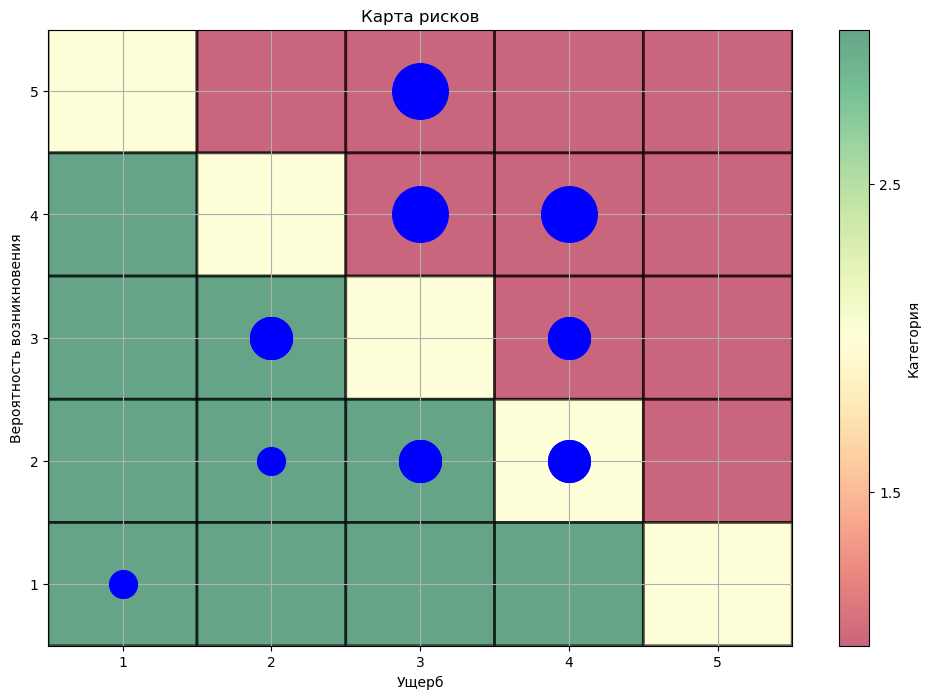

In [ ]:
plt.figure(figsize=(12, 8))
plt.pcolor(X, Y, Z, cmap='RdYlGn', edgecolors='k', linewidths=2, alpha=0.6)  # Используем кастомную цветовую карту RdYlGn
plt.colorbar(ticks=[1.5, 2.5, 3.5], label='Категория')  # Добавляем цветовую шкалу с категориями
plt.xlabel('Ущерб')
plt.ylabel('Вероятность возникновения')
plt.title('Карта рисков')

# Добавляем шары для каждого ID
for i, row in df.iterrows():
    plt.plot(row['damage'], row['prob'], marker='o', markersize=row['sens']*10, color='blue')  # Создаем шарик для каждого ID

plt.grid(True)
plt.show()